In [1]:
import pandas as pd
df = pd.read_csv('spooky.csv')
df.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [2]:
df.loc[:,"text"]

0        This process, however, afforded me no means of...
1        It never once occurred to me that the fumbling...
2        In his left hand was a gold snuff box, from wh...
3        How lovely is spring As we looked from Windsor...
4        Finding nothing else, not even gold, the Super...
                               ...                        
19574    I could have fancied, while I looked at it, th...
19575    The lids clenched themselves together as if in...
19576    Mais il faut agir that is to say, a Frenchman ...
19577    For an item of news like this, it strikes us i...
19578    He laid a gnarled claw on my shoulder, and it ...
Name: text, Length: 19579, dtype: object

In [3]:
import spacy
import nltk
import wordcloud
import pywaffle
import textblob
import re

In [4]:
#removing dupliates
import re
from textblob import TextBlob
from textblob import Word
def remove_duplicates(text):
    rx = re.compile(r'([^\W\d_])\1{2,}')
    # tlga more than 3 consecutive chars then , [\W\d_] tn7i ay haja mhich character, then doubli chaque character w tdir correction lel word.
    return re.sub(r'[^\W\d_]+', lambda x: Word(rx.sub(r'\1\1', x.group())).correct() if rx.search(x.group()) else x.group(), text)
df['text']= df['text'].apply(lambda x:remove_duplicates(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
import unicodedata
# nkfd decompose char into base
# encode: encode char into acsi , ignore char if not have acssi
# decode: decode encoded char into utf-8
def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [6]:
df['text']= df['text'].apply(lambda x:remove_accented_chars(x))


In [7]:
def urls_handling(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(pattern, '', text)
df['text']= df['text'].apply(lambda x:urls_handling(x))

In [8]:
def remove_html_tags(text):
    return re.sub('<.*?>', '', text)
df['text']= df['text'].apply(lambda x:remove_html_tags(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [9]:
def remove_emails(text):
    return re.sub('[\w\.-]+@[\w\.-]+\.\w+', '', text)
df['text']= df['text'].apply(lambda x:remove_emails(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [10]:

df['text']= df['text'].apply(lambda x: x.lower())
df.head()

,id,text,author
0,id26305,"this process, however, afforded me no means of...",EAP
1,id17569,it never once occurred to me that the fumbling...,HPL
2,id11008,"in his left hand was a gold snuff box, from wh...",EAP
3,id27763,how lovely is spring as we looked from windsor...,MWS
4,id12958,"finding nothing else, not even gold, the super...",HPL


In [11]:
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['text']= df['text'].apply(lambda x:remove_punctuation(x))
df.head()

,id,text,author
0,id26305,this process however afforded me no means of a...,EAP
1,id17569,it never once occurred to me that the fumbling...,HPL
2,id11008,in his left hand was a gold snuff box from whi...,EAP
3,id27763,how lovely is spring as we looked from windsor...,MWS
4,id12958,finding nothing else not even gold the superin...,HPL


In [12]:
 #removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    en_stopwords=set(stopwords.words('english'))
    text = word_tokenize(text)
    text=[w.lower() for w in text ]
    words=[w for w in text if w not in en_stopwords]
    s = " "
    words=s.join(words)
    return words

In [13]:
df['text']= df['text'].apply(lambda x:remove_stopwords(x))

In [14]:
df.head()

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL


In [15]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
def snow_stem(text):
    text = word_tokenize(text)
    text=[w.lower() for w in text ]
    words=[snow_stemmer.stem(w) for w in text ]
    s = " "
    words=s.join(words)
    return words

In [16]:
df['text']=df['text'].apply(lambda x:snow_stem(x))

In [17]:
df.head()

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL


In [18]:
from nltk.tokenize import TreebankWordTokenizer
def rule_based_tokenization(text):
    tokenizer=TreebankWordTokenizer()
    return tokenizer.tokenize(text)


In [19]:
df['text']= df['text'].apply(lambda x:rule_based_tokenization(x))

In [20]:
df.head()

,id,text,author
0,id26305,"[process, howev, afford, mean, ascertain, dime...",EAP
1,id17569,"[never, occur, fumbl, might, mere, mistak]",HPL
2,id11008,"[left, hand, gold, snuff, box, caper, hill, cu...",EAP
3,id27763,"[love, spring, look, windsor, terrac, sixteen,...",MWS
4,id12958,"[find, noth, els, even, gold, superintend, aba...",HPL


In [21]:
df=df.drop("id", axis='columns')

In [22]:
df.to_csv('spooky_preprocessed_3.csv', index=False)

the best models that gave approximate of 0.66 in the test set are using the TF-IDF and One hot encoding vectorization techniques
- i have changed the tokenization method as first (method used before is sentence piece) and now i used rule based tokeniation using the treebank word tokenizer

In [23]:
import pandas as pd
df = pd.read_csv('spooky_preprocessed_3.csv')
df.head(10)

,text,author
0,"['process', 'howev', 'afford', 'mean', 'ascert...",EAP
1,"['never', 'occur', 'fumbl', 'might', 'mere', '...",HPL
2,"['left', 'hand', 'gold', 'snuff', 'box', 'cape...",EAP
3,"['love', 'spring', 'look', 'windsor', 'terrac'...",MWS
4,"['find', 'noth', 'els', 'even', 'gold', 'super...",HPL
5,"['youth', 'pass', 'solitud', 'best', 'year', '...",MWS
6,"['astronom', 'perhap', 'point', 'took', 'refug...",EAP
7,"['surcingl', 'hung', 'riband', 'bodi']",EAP
8,"['knew', 'could', 'say', 'stereotomi', 'withou...",EAP
9,"['confess', 'neither', 'structur', 'languag', ...",MWS


In [24]:
X=df.drop(['author'],axis='columns')
X.head()

,text
0,"['process', 'howev', 'afford', 'mean', 'ascert..."
1,"['never', 'occur', 'fumbl', 'might', 'mere', '..."
2,"['left', 'hand', 'gold', 'snuff', 'box', 'cape..."
3,"['love', 'spring', 'look', 'windsor', 'terrac'..."
4,"['find', 'noth', 'els', 'even', 'gold', 'super..."


In [25]:

y=df.drop(['text'],axis='columns')
y.head()

,author
0,EAP
1,HPL
2,EAP
3,MWS
4,HPL


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#y = pd.Series(y_encoded, name='author')
y

/home/chaima/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, ..., 0, 0, 1])

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2, 
                                                     random_state=0,
                                                     stratify=y)

In [29]:
print('X shape:', X.shape)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('Y shape:', y.shape)
print('Y train shape:', y_train.shape)
print('Y test shape:', y_test.shape)


X shape: (19579, 1)
X train shape: (15663, 1)
X test shape: (3916, 1)
Y shape: (19579,)
Y train shape: (15663,)
Y test shape: (3916,)


In [30]:
X_train['text']

6479     ['old', 'seaman', 'surviv', 'son', 'welcom', '...
4402     ['tramp', 'hors', 'distinct', 'heard', 'silenc...
11402    ['travel', 'time', 'vintag', 'heard', 'song', ...
1398     ['found', 'exact', 'profess', 'somewhat', 'muc...
5448     ['foremost', 'among', 'weird', 'fanci', 'alon'...
                               ...                        
14966    ['librari', 'mantel', 'home', 'hung', 'exact',...
2581                     ['discolor', 'cellular', 'tissu']
640      ['manner', 'mani', 'appal', 'hour', 'pass', 's...
4597                          ['forehead', 'broad', 'low']
1951     ['perus', 'felt', 'grow', 'gradual', 'smaller'...
Name: text, Length: 15663, dtype: object

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(X_train['text'])
x_test_tfidf = tfidf.transform(X_test['text'])

In [32]:
print("Feature Names:\n", tfidf.get_feature_names_out())

Feature Names:
 ['aaem' 'ab' 'aback' ... 'zopyrus' 'zubmizzion' 'zuro']


In [33]:
x_train_tfidf=x_train_tfidf.toarray()

In [34]:
x_test_tfidf=x_test_tfidf.toarray()

In [35]:
# Convert sparse matrices to DataFrames
columns = tfidf.get_feature_names_out()
df_train_tfidf = pd.DataFrame(x_train_tfidf, columns=columns)
df_test_tfidf = pd.DataFrame(x_test_tfidf, columns=columns)

In [36]:
df_train_tfidf.head()

,aaem,ab,aback,abaft,abandon,abaout,abas,abash,abat,abb,...,zit,zobna,zobnarian,zodiac,zoilus,zokkar,zone,zopyrus,zubmizzion,zuro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_test_tfidf.head()

,aaem,ab,aback,abaft,abandon,abaout,abas,abash,abat,abb,...,zit,zobna,zobnarian,zodiac,zoilus,zokkar,zone,zopyrus,zubmizzion,zuro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
row_sums =df_train_tfidf.sum(axis=1)
print(row_sums)

0        5.763519
1        2.600224
2        2.761161
3        5.532508
4        3.791259
           ...   
15658    3.231534
15659    1.725961
15660    4.381243
15661    1.724457
15662    3.500692
Length: 15663, dtype: float64


training

logistic regression

In [39]:

from sklearn import linear_model
classes=np.unique(y_train)
lr = linear_model.LogisticRegression(multi_class='multinomial',
                                      solver='sag',
                                      class_weight={c: 1 for c in classes})
lr.fit(x_train_tfidf, y_train)

LogisticRegression(class_weight={0: 1, 1: 1, 2: 1}, multi_class='multinomial',
                   solver='sag')

In [40]:
y_pred = lr.predict(x_test_tfidf)
pred=lr.predict_proba(x_test_tfidf)

In [41]:
from sklearn.metrics import accuracy_score, log_loss
print('accuracy:',accuracy_score(y_test, y_pred))

accuracy: 0.8097548518896833


In [42]:
print('log loss lr:',log_loss(y_test, pred))

log loss lr: 0.5421346903824495


In [43]:
from sklearn.metrics import classification_report
zero_division_param = 1
report_lr = classification_report(y_test, y_pred, zero_division=zero_division_param)
print("\nClassification Report for TF-IDF Representation:\n", report_lr)


Classification Report for TF-IDF Representation:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1580
           1       0.83      0.78      0.80      1127
           2       0.84      0.77      0.80      1209

    accuracy                           0.81      3916
   macro avg       0.82      0.80      0.81      3916
weighted avg       0.81      0.81      0.81      3916



MLP classifier using the same previous architecture

In [169]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
tfidf_classifier = MLPClassifier(hidden_layer_sizes=(50), max_iter=300,activation = 'relu',solver='adam',random_state=0)

In [170]:
import time
start_time = time.time()
tfidf_classifier.fit(x_train_tfidf, y_train)
end_time = time.time()
tfidf_training_time = end_time - start_time

In [171]:
y_pred_tfidf = tfidf_classifier.predict(x_test_tfidf)

Previous Results
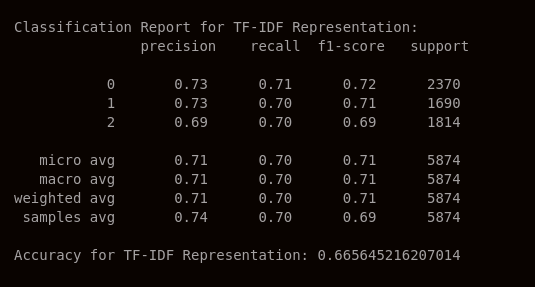

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
zero_division_param = 1

report_tfidf_test = classification_report(y_test, y_pred_tfidf, zero_division=zero_division_param)
print("\nClassification Report for TF-IDF Representation:\n", report_tfidf_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Accuracy for TF-IDF Representation:", accuracy_tfidf)


Classification Report for TF-IDF Representation:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1580
           1       0.78      0.72      0.75      1127
           2       0.72      0.75      0.73      1209

    accuracy                           0.75      3916
   macro avg       0.75      0.75      0.75      3916
weighted avg       0.75      0.75      0.75      3916

Accuracy for TF-IDF Representation: 0.7502553626149132


In [173]:
tfidf_training_time

1318.8519837856293

previous Training time for the tfidf based model: 206.07210993766785 seconds

now we'll try to modify the mlp architecture 

In [174]:
tfidf_clf = MLPClassifier(hidden_layer_sizes=(32,16,8),max_iter=300,activation = 'relu',solver='adam',random_state=0)

In [175]:
import time
start_time = time.time()
tfidf_clf.fit(x_train_tfidf, y_train)
end_time = time.time()
tfidf_clf_training_time = end_time - start_time

In [176]:
y_pred_tfidf_clf = tfidf_clf.predict(x_test_tfidf)

In [177]:
report_tfidf = classification_report(y_test, y_pred_tfidf_clf, zero_division=zero_division_param)
print("\nClassification Report for TF-IDF Representation:\n", report_tfidf)
print("Accuracy mlp:", accuracy_score(y_test, y_pred_tfidf_clf))


Classification Report for TF-IDF Representation:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      1580
           1       0.81      0.72      0.76      1127
           2       0.66      0.77      0.71      1209

    accuracy                           0.75      3916
   macro avg       0.76      0.75      0.75      3916
weighted avg       0.76      0.75      0.75      3916

Accuracy mlp: 0.7505107252298263


Naive Bayes model

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

MultinomialNB()

In [45]:
y_pred_nb = nb.predict(x_test_tfidf)
pred_nb=nb.predict_proba(x_test_tfidf)

In [46]:
print('accuracy:',accuracy_score(y_test, y_pred_nb))
print('log loss lr:',log_loss(y_test, pred_nb))

accuracy: 0.8153728294177732
log loss lr: 0.5849931054230106


In [47]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1580
           1       0.90      0.73      0.81      1127
           2       0.83      0.81      0.82      1209

    accuracy                           0.82      3916
   macro avg       0.83      0.81      0.81      3916
weighted avg       0.82      0.82      0.82      3916



SVM

In [191]:
from sklearn.svm import SVC
svm= SVC(kernel='linear',probability=True) 
svm.fit(x_train_tfidf,y_train)

SVC(kernel='linear', probability=True)

In [192]:
y_pred_svm = svm.predict(x_test_tfidf)

In [193]:
pred_svm=svm.predict_proba(x_test_tfidf)

In [194]:
print('accuracy:',accuracy_score(y_test, y_pred_svm))
print('log loss lr:',log_loss(y_test, pred_svm))

accuracy: 0.8010725229826353
log loss lr: 0.47319472036205884


In [41]:
print(classification_report(y_test, y_pred_svm))

NameError: name 'y_pred_svm' is not defined

XGBOOST

In [48]:
import xgboost as XGB
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }
            
xgb_clf = XGB.XGBClassifier(**params)
xgb_clf.fit(x_train_tfidf, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
y_pred_xgb = xgb_clf.predict(x_test_tfidf)
pred_xgb=xgb_clf.predict_proba(x_test_tfidf)

In [50]:
print('accuracy:',accuracy_score(y_test, y_pred_xgb))
print('log loss lr:',log_loss(y_test, pred_xgb))

accuracy: 0.5967824310520939
log loss lr: 0.9029549654440971


In [51]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.53      0.90      0.66      1580
           1       0.74      0.38      0.50      1127
           2       0.77      0.40      0.53      1209

    accuracy                           0.60      3916
   macro avg       0.68      0.56      0.56      3916
weighted avg       0.66      0.60      0.58      3916



In [52]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense ,Dropout,BatchNormalization

In [31]:
model = Sequential()
model.add(Dense(128 ,input_shape= (x_train_tfidf.shape[1],),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1797760   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1806211 (6.89 MB)
Trainable params: 1806211 (6.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(x_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(x_test_tfidf, y_test))

2024-04-27 23:38:42.835789: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 879884688 exceeds 10% of free system memory.


Epoch 1/10
490/490 [==============================] - 19s 36ms/step - loss: 0.6402 - accuracy: 0.7186 - val_loss: 0.4349 - val_accuracy: 0.8202
Epoch 2/10
490/490 [==============================] - 18s 37ms/step - loss: 0.2605 - accuracy: 0.9044 - val_loss: 0.4455 - val_accuracy: 0.8261
Epoch 3/10
490/490 [==============================] - 17s 35ms/step - loss: 0.1357 - accuracy: 0.9536 - val_loss: 0.5180 - val_accuracy: 0.8218
Epoch 4/10
490/490 [==============================] - 17s 36ms/step - loss: 0.0686 - accuracy: 0.9785 - val_loss: 0.6291 - val_accuracy: 0.8161
Epoch 5/10
490/490 [==============================] - 17s 35ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.7205 - val_accuracy: 0.8133
Epoch 6/10
490/490 [==============================] - 17s 35ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.8209 - val_accuracy: 0.8069
Epoch 7/10
490/490 [==============================] - 17s 35ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.9133 - val_accuracy:

In [39]:
y_train_predclass = model.predict(x_train_tfidf)
y_test_predclass = model.predict(x_test_tfidf)
from sklearn.metrics import accuracy_score, classification_report

# Convert predicted probabilities to class labels
y_train_predclass_labels = y_train_predclass.argmax(axis=1)
y_test_predclass_labels = y_test_predclass.argmax(axis=1)

# Calculate accuracy scores
train_accuracy = round(accuracy_score(y_train, y_train_predclass_labels), 2)
test_accuracy = round(accuracy_score(y_test, y_test_predclass_labels), 2)

# Print accuracies
print("Deep Neural Network - Train accuracy:", train_accuracy)
print("Deep Neural Network - Test accuracy:", test_accuracy)

123/123 [==============================] - 1s 6ms/step
Deep Neural Network - Train accuracy: 1.0
Deep Neural Network - Test accuracy: 0.81


In [40]:
print(classification_report(y_test, y_test_predclass_labels))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1580
           1       0.83      0.80      0.82      1127
           2       0.81      0.78      0.80      1209

    accuracy                           0.81      3916
   macro avg       0.81      0.81      0.81      3916
weighted avg       0.81      0.81      0.81      3916



In [54]:
model_2 = Sequential()
model_2.add(Dense(128,input_shape= (x_train_tfidf.shape[1],),activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(BatchNormalization())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(3, activation='softmax'))

In [56]:
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1797760   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                      

In [59]:
model_2.fit(x_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(x_test_tfidf, y_test))

2024-04-29 01:28:16.019924: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 879884688 exceeds 10% of free system memory.


Epoch 1/10
490/490 [==============================] - 22s 45ms/step - loss: 0.2851 - accuracy: 0.8920 - val_loss: 0.4885 - val_accuracy: 0.8095
Epoch 2/10
490/490 [==============================] - 21s 42ms/step - loss: 0.1546 - accuracy: 0.9451 - val_loss: 0.5711 - val_accuracy: 0.8133
Epoch 3/10
490/490 [==============================] - 22s 44ms/step - loss: 0.0991 - accuracy: 0.9642 - val_loss: 0.6762 - val_accuracy: 0.8046
Epoch 4/10
490/490 [==============================] - 21s 43ms/step - loss: 0.0805 - accuracy: 0.9708 - val_loss: 0.7278 - val_accuracy: 0.8041
Epoch 5/10
490/490 [==============================] - 21s 43ms/step - loss: 0.0744 - accuracy: 0.9737 - val_loss: 0.7756 - val_accuracy: 0.8049
Epoch 6/10
490/490 [==============================] - 17s 34ms/step - loss: 0.0662 - accuracy: 0.9757 - val_loss: 0.8155 - val_accuracy: 0.8003
Epoch 7/10
490/490 [==============================] - 16s 34ms/step - loss: 0.0668 - accuracy: 0.9773 - val_loss: 0.8238 - val_accuracy:

In [60]:
y_train_predclass = model_2.predict(x_train_tfidf)
y_test_predclass = model_2.predict(x_test_tfidf)
from sklearn.metrics import accuracy_score, classification_report

# Convert predicted probabilities to class labels
y_train_predclass_labels = y_train_predclass.argmax(axis=1)
y_test_predclass_labels = y_test_predclass.argmax(axis=1)

# Calculate accuracy scores
train_accuracy = round(accuracy_score(y_train, y_train_predclass_labels), 2)
test_accuracy = round(accuracy_score(y_test, y_test_predclass_labels), 2)

# Print accuracies
print("Deep Neural Network - Train accuracy:", train_accuracy)
print("Deep Neural Network - Test accuracy:", test_accuracy)

2024-04-29 01:32:07.509172: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 879884688 exceeds 10% of free system memory.


123/123 [==============================] - 1s 6ms/step
Deep Neural Network - Train accuracy: 1.0
Deep Neural Network - Test accuracy: 0.8


In [61]:
print(classification_report(y_test, y_test_predclass_labels))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1580
           1       0.80      0.81      0.81      1127
           2       0.81      0.76      0.78      1209

    accuracy                           0.80      3916
   macro avg       0.80      0.80      0.80      3916
weighted avg       0.80      0.80      0.80      3916

